In [1]:
!pip install ultralytics
!nvidia-smi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
import numpy as np
import pandas as pd
import os
import random
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir ~/.kaggle

In [5]:
!cp /content/drive/MyDrive/CollabData/kaggle_API/kaggle.json ~/.kaggle/kaggle.json

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download ikbal12082004/traffic-sign-in-indonesia

Dataset URL: https://www.kaggle.com/datasets/ikbal12082004/traffic-sign-in-indonesia
License(s): MIT
100% 885M/888M [00:12<00:00, 105MB/s]
100% 888M/888M [00:12<00:00, 72.0MB/s]


In [8]:
!unzip traffic-sign-in-indonesia.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/labels/28-141-_jpg.rf.f25dac4ff11a3ac2a8b978f61552bba5.txt  
  inflating: train/labels/28-143-_jpg.rf.1b2a06e6602ddaf2cdc83594bf737c46.txt  
  inflating: train/labels/28-143-_jpg.rf.982a7a94e1b9f941bf30cb8c0c6ab981.txt  
  inflating: train/labels/28-143-_jpg.rf.d336c7ad76613a822ed820adc73884a2.txt  
  inflating: train/labels/28-144-_jpg.rf.a9b28ab39ee10c60c9e53141a1f18dcf.txt  
  inflating: train/labels/28-144-_jpg.rf.ae08c3b096537a3cf730fe72d780f9af.txt  
  inflating: train/labels/28-144-_jpg.rf.cd1e94919d3cce4d0f679f55f34a281c.txt  
  inflating: train/labels/28-145-_jpg.rf.2217f5bbb89b34c81afcac2f9bc494b1.txt  
  inflating: train/labels/28-145-_jpg.rf.3af50d63d90ae7cac036c8879ba71ca3.txt  
  inflating: train/labels/28-145-_jpg.rf.ba6eb604c0484a32029476827e7ea6f0.txt  
  inflating: train/labels/28-146-_jpg.rf.05c933105516021a04e9185656475681.txt  
  inflating: train/labels/28-146-_jpg.rf.411fb5a19e0c81d0185cfe672397

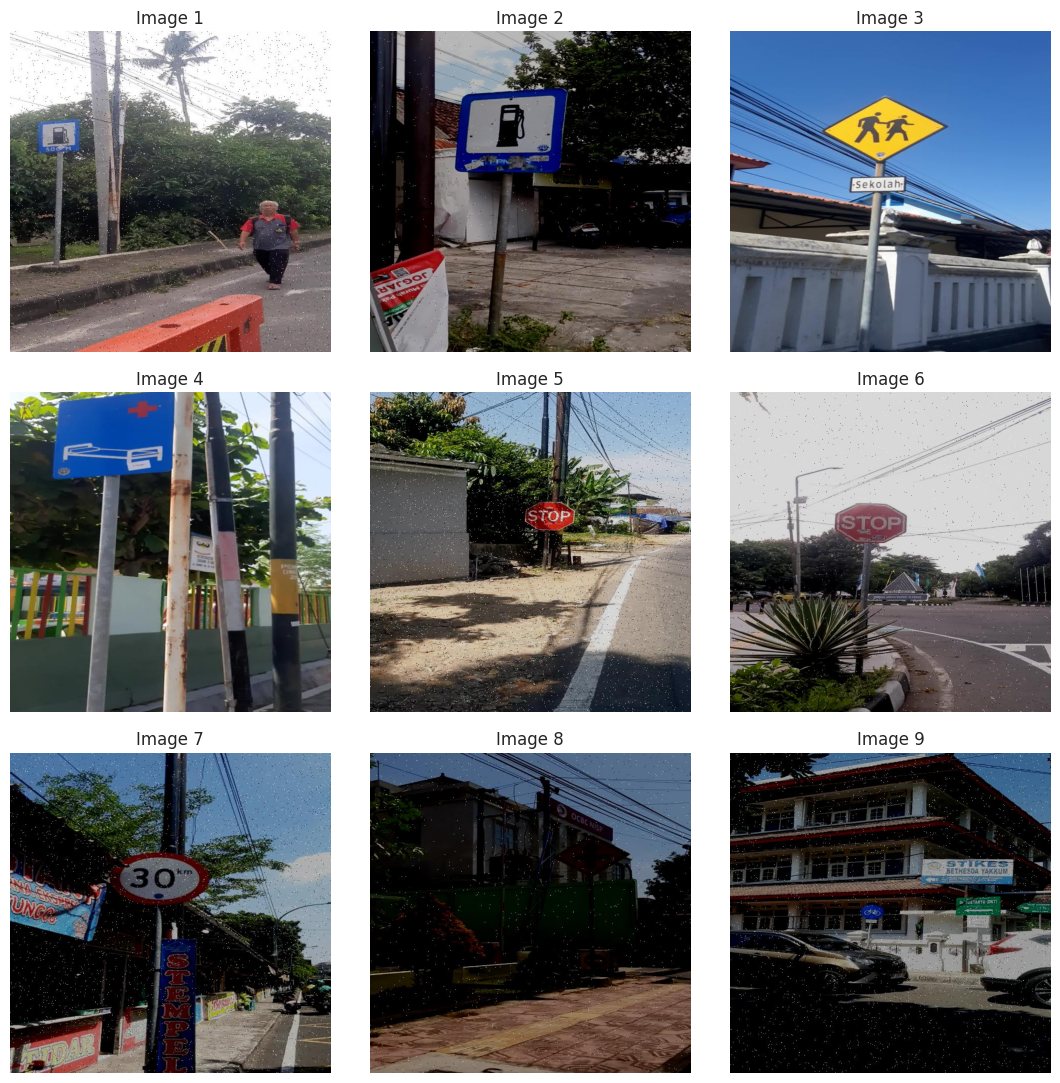

In [9]:
Image_dir = '/content/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [11]:
# Use a pretrained YOLOv11n model
model = YOLO("yolo11n.pt")

# Build from YAML and transfer weights
Final_model = YOLO('yolo11n.yaml').load('yolo11n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/data.yaml",epochs=100, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 0)

Transferred 499/499 items from pretrained weights
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.yaml, data=/content/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

train: Scanning /content/train/labels... 9762 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9762/9762 [00:04<00:00, 2417.66it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 929 images, 0 backgrounds, 0 corrupt: 100%|██████████| 929/929 [00:00<00:00, 1120.30it/s]


val: New cache created: /content/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.98G     0.7408      3.848     0.9542         59        416: 100%|██████████| 153/153 [01:42<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]

                   all        929        965      0.436      0.538      0.529      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.97G     0.6789      1.854     0.9366         48        416: 100%|██████████| 153/153 [01:38<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]


                   all        929        965       0.66      0.692      0.738      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.94G     0.7167      1.576     0.9521         60        416: 100%|██████████| 153/153 [01:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]


                   all        929        965      0.635      0.667      0.706       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.97G     0.7487      1.437     0.9864         57        416: 100%|██████████| 153/153 [01:37<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]


                   all        929        965      0.693      0.748      0.802      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.99G     0.6769      1.151      0.964         55        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        929        965      0.819      0.703      0.799      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.94G     0.6369     0.9499     0.9592         56        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        929        965      0.914      0.889      0.955      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.94G     0.6007     0.8223     0.9412         59        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        929        965      0.881       0.91      0.951      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.94G     0.5764     0.7314     0.9338         58        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        929        965      0.886      0.926      0.952       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.97G     0.5612     0.6876     0.9308         59        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        929        965       0.91      0.891      0.958      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.97G      0.541     0.6434     0.9231         57        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        929        965      0.943      0.908      0.965      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.94G     0.5303     0.6138     0.9215         63        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        929        965      0.942      0.917      0.969      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.97G      0.517     0.5802     0.9182         44        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]

                   all        929        965      0.931      0.917      0.967      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.97G      0.508      0.556     0.9111         56        416: 100%|██████████| 153/153 [01:34<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        929        965      0.913      0.934      0.974      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.97G     0.4956     0.5437     0.9083         57        416: 100%|██████████| 153/153 [01:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all        929        965      0.948      0.951      0.978      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.94G     0.4936     0.5244      0.908         48        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        929        965      0.951      0.949      0.983      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.94G     0.4813     0.5051     0.9043         59        416: 100%|██████████| 153/153 [01:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        929        965      0.979      0.982      0.991      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.94G     0.4813     0.4985     0.9048         60        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]


                   all        929        965      0.978      0.967      0.987      0.932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.94G     0.4735     0.4845      0.903         72        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        929        965      0.971      0.948      0.987      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.97G      0.464     0.4725     0.8989         61        416: 100%|██████████| 153/153 [01:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        929        965      0.979      0.964      0.983      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.94G     0.4582     0.4601     0.8946         55        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        929        965      0.978      0.971      0.989      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.99G     0.4504     0.4534     0.8904         49        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        929        965      0.971      0.974       0.99      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.94G     0.4504     0.4403     0.8911         48        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        929        965      0.975      0.966      0.988      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.94G     0.4468       0.43     0.8878         55        416: 100%|██████████| 153/153 [01:36<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.32it/s]

                   all        929        965       0.98      0.974      0.991      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.94G     0.4413     0.4252     0.8872         62        416: 100%|██████████| 153/153 [01:35<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        929        965      0.984      0.976       0.99       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.97G     0.4396     0.4162     0.8875         51        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        929        965      0.982      0.978      0.991       0.95



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.97G     0.4405     0.4158     0.8911         60        416: 100%|██████████| 153/153 [01:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.26it/s]

                   all        929        965      0.981       0.98       0.99      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.94G     0.4301     0.4077     0.8867         52        416: 100%|██████████| 153/153 [01:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all        929        965      0.992       0.98      0.991      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.94G     0.4276      0.404     0.8846         50        416: 100%|██████████| 153/153 [01:35<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        929        965      0.988      0.982      0.991      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.97G     0.4275     0.4024     0.8825         70        416: 100%|██████████| 153/153 [01:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        929        965      0.979      0.985       0.99      0.955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.97G      0.422     0.3861     0.8779         53        416: 100%|██████████| 153/153 [01:38<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        929        965       0.99      0.976      0.992      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.97G     0.4194     0.3835     0.8821         56        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        929        965       0.99      0.978      0.991      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.94G     0.4201     0.3876     0.8808         53        416: 100%|██████████| 153/153 [01:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        929        965      0.986      0.982      0.991      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.94G     0.4177     0.3777     0.8793         54        416: 100%|██████████| 153/153 [01:38<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        929        965      0.984      0.983       0.99      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.97G     0.4119      0.368     0.8762         59        416: 100%|██████████| 153/153 [01:40<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        929        965      0.991      0.984      0.992      0.963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.97G     0.4109      0.368     0.8766         49        416: 100%|██████████| 153/153 [01:36<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        929        965      0.991      0.986      0.992      0.961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.94G     0.4088     0.3636     0.8775         54        416: 100%|██████████| 153/153 [01:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]


                   all        929        965       0.99       0.98      0.991      0.963

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.94G     0.4059     0.3592     0.8742         51        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        929        965      0.987      0.982      0.989      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.97G     0.3998     0.3561     0.8696         55        416: 100%|██████████| 153/153 [01:35<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        929        965       0.99       0.98      0.991      0.964



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.97G     0.3999     0.3498     0.8721         53        416: 100%|██████████| 153/153 [01:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        929        965      0.992      0.982       0.99      0.962



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.98G     0.3969     0.3467      0.872         52        416: 100%|██████████| 153/153 [01:35<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        929        965      0.991      0.987       0.99      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.94G     0.3996     0.3527     0.8706         61        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]

                   all        929        965       0.99      0.988       0.99      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.99G     0.3887     0.3354     0.8675         55        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        929        965      0.993      0.989      0.992      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.99G     0.3883     0.3349     0.8686         59        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        929        965      0.992       0.99      0.992      0.968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.97G     0.3872     0.3327     0.8673         60        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.33it/s]

                   all        929        965      0.993      0.989      0.991      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.94G     0.3845     0.3317     0.8695         59        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        929        965      0.992      0.987      0.991      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.94G      0.383     0.3295      0.869         53        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.22it/s]

                   all        929        965      0.993      0.991      0.993      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.97G     0.3808     0.3265     0.8653         50        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        929        965      0.993      0.988      0.992      0.969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.94G     0.3824     0.3215     0.8666         43        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]

                   all        929        965      0.991      0.989      0.992      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.97G     0.3779     0.3172     0.8679         50        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        929        965      0.991      0.989      0.992       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.97G     0.3744     0.3119     0.8638         53        416: 100%|██████████| 153/153 [01:34<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        929        965      0.987      0.986      0.991      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.94G     0.3748     0.3112     0.8622         55        416: 100%|██████████| 153/153 [01:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        929        965      0.991       0.99      0.992      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.97G     0.3672     0.3018     0.8597         44        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        929        965      0.994      0.988      0.991      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.94G     0.3639     0.2994     0.8591         61        416: 100%|██████████| 153/153 [01:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        929        965      0.993      0.991      0.992      0.973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.94G     0.3677     0.3072     0.8594         60        416: 100%|██████████| 153/153 [01:35<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        929        965      0.994      0.988      0.991      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.94G      0.368     0.3045     0.8644         58        416: 100%|██████████| 153/153 [01:34<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]


                   all        929        965      0.993      0.991      0.991      0.973

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.94G     0.3612     0.2982     0.8596         59        416: 100%|██████████| 153/153 [01:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.25it/s]

                   all        929        965      0.992      0.991      0.991      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.94G     0.3592     0.2932      0.857         48        416: 100%|██████████| 153/153 [01:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        929        965      0.992       0.99      0.991      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.94G     0.3584     0.2948     0.8564         60        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all        929        965      0.992       0.99      0.991      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.94G     0.3548     0.2895     0.8597         56        416: 100%|██████████| 153/153 [01:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        929        965      0.991       0.99      0.991      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.97G     0.3538     0.2892     0.8573         60        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        929        965      0.991       0.99      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.94G     0.3512     0.2859     0.8546         55        416: 100%|██████████| 153/153 [01:35<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        929        965       0.99      0.991       0.99      0.972



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.97G     0.3492     0.2803     0.8543         62        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.29it/s]

                   all        929        965      0.991      0.991      0.991      0.974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.97G     0.3507     0.2802     0.8552         63        416: 100%|██████████| 153/153 [01:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]

                   all        929        965      0.992      0.989      0.991      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.94G     0.3491      0.278     0.8538         65        416: 100%|██████████| 153/153 [01:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        929        965      0.992      0.991      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.94G     0.3468     0.2799     0.8517         50        416: 100%|██████████| 153/153 [01:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]

                   all        929        965      0.994      0.989      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.97G     0.3425     0.2757     0.8541         71        416: 100%|██████████| 153/153 [01:34<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        929        965      0.992      0.992      0.992      0.975



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.97G      0.339     0.2734     0.8491         50        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]

                   all        929        965      0.992      0.992      0.992      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.97G     0.3384     0.2684     0.8541         56        416: 100%|██████████| 153/153 [01:35<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]


                   all        929        965      0.993      0.992      0.992      0.976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.94G      0.338     0.2672     0.8522         57        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        929        965      0.993      0.992      0.992      0.976



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.97G     0.3324     0.2644     0.8501         52        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        929        965      0.993      0.992      0.992      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.94G     0.3316     0.2621     0.8494         61        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.35it/s]

                   all        929        965      0.993      0.992      0.992      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.94G     0.3291     0.2569     0.8489         54        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        929        965      0.993      0.992      0.991      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.94G     0.3293     0.2581     0.8483         53        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.16it/s]

                   all        929        965      0.993      0.993      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.94G      0.326      0.253     0.8449         51        416: 100%|██████████| 153/153 [01:35<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        929        965      0.992      0.992      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.94G     0.3256     0.2539     0.8478         66        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        929        965      0.991      0.992      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.94G     0.3233     0.2502     0.8469         51        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        929        965      0.992      0.993      0.992      0.977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.94G      0.321     0.2454     0.8453         51        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        929        965      0.993      0.993      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.97G     0.3177     0.2436     0.8418         41        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.33it/s]

                   all        929        965      0.993      0.993      0.992      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.97G     0.3186     0.2448     0.8452         46        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        929        965      0.993      0.993      0.991      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.97G      0.317      0.244     0.8445         73        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        929        965      0.993      0.994      0.991      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.97G     0.3109     0.2361     0.8414         47        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        929        965      0.993      0.993      0.991      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.98G     0.3122     0.2397     0.8422         57        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.34it/s]

                   all        929        965      0.994      0.993      0.991      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.94G     0.3062     0.2304     0.8433         55        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

                   all        929        965      0.993      0.993      0.992      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.98G     0.3058     0.2282     0.8415         60        416: 100%|██████████| 153/153 [01:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.21it/s]

                   all        929        965      0.993      0.993      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.97G      0.305     0.2274     0.8399         69        416: 100%|██████████| 153/153 [01:37<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        929        965      0.994      0.993      0.991      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.97G     0.3011     0.2278     0.8364         63        416: 100%|██████████| 153/153 [01:37<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        929        965      0.993      0.993      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.97G     0.3016     0.2273     0.8386         61        416: 100%|██████████| 153/153 [01:36<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.30it/s]

                   all        929        965      0.993      0.993      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.94G     0.2926       0.22     0.8385         49        416: 100%|██████████| 153/153 [01:36<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        929        965      0.994      0.993      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.97G     0.2924     0.2211     0.8379         58        416: 100%|██████████| 153/153 [01:35<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        929        965      0.994      0.993      0.992      0.978



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.94G     0.2949     0.2209     0.8357         47        416: 100%|██████████| 153/153 [01:35<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        929        965      0.994      0.993      0.992      0.978


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.94G     0.2438     0.1692     0.7944         35        416: 100%|██████████| 153/153 [01:34<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.28it/s]

                   all        929        965      0.994      0.993      0.992      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.94G     0.2414      0.166     0.7959         36        416: 100%|██████████| 153/153 [01:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        929        965      0.994      0.993      0.992      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.94G     0.2387     0.1621     0.7915         34        416: 100%|██████████| 153/153 [01:32<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        929        965      0.994      0.994      0.992       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.94G     0.2346       0.16     0.7928         34        416: 100%|██████████| 153/153 [01:31<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        929        965      0.994      0.994      0.992      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.94G     0.2322     0.1587     0.7913         34        416: 100%|██████████| 153/153 [01:32<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        929        965      0.994      0.994      0.992      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.94G     0.2287     0.1571     0.7893         36        416: 100%|██████████| 153/153 [01:32<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]

                   all        929        965      0.994      0.994      0.992      0.979



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.94G     0.2251     0.1516     0.7881         36        416: 100%|██████████| 153/153 [01:33<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.36it/s]

                   all        929        965      0.994      0.994      0.992       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.95G     0.2223     0.1496     0.7896         36        416: 100%|██████████| 153/153 [01:32<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        929        965      0.994      0.994      0.992       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.94G     0.2213     0.1477     0.7896         34        416: 100%|██████████| 153/153 [01:32<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        929        965      0.994      0.994      0.992       0.98



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.94G     0.2188     0.1467     0.7884         35        416: 100%|██████████| 153/153 [01:33<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.27it/s]

                   all        929        965      0.994      0.994      0.992       0.98



100 epochs completed in 2.881 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,588,002 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.23s/it]


                   all        929        965      0.994      0.994      0.992       0.98
Balai Pertolongan Pertama         39         39      0.998          1      0.995      0.991
      Banyak Anak-Anak         30         30      0.996      0.967      0.978      0.967
  Dilarang Belok Kanan         27         27      0.986          1      0.995      0.963
     Dilarang Berhenti         33         33          1      0.983      0.995      0.995
Dilarang Berjalan Terus         26         26      0.996          1      0.995      0.995
        Dilarang Masuk         26         26      0.996          1      0.995      0.979
   Dilarang Mendahului         30         30      0.995          1      0.995      0.995
       Dilarang Parkir         32         32          1      0.972      0.995      0.995
  Dilarang Putar Balik         27         29      0.996          1      0.995      0.983
                Gereja         30         30      0.996          1      0.995      0.993
             Hati

In [12]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

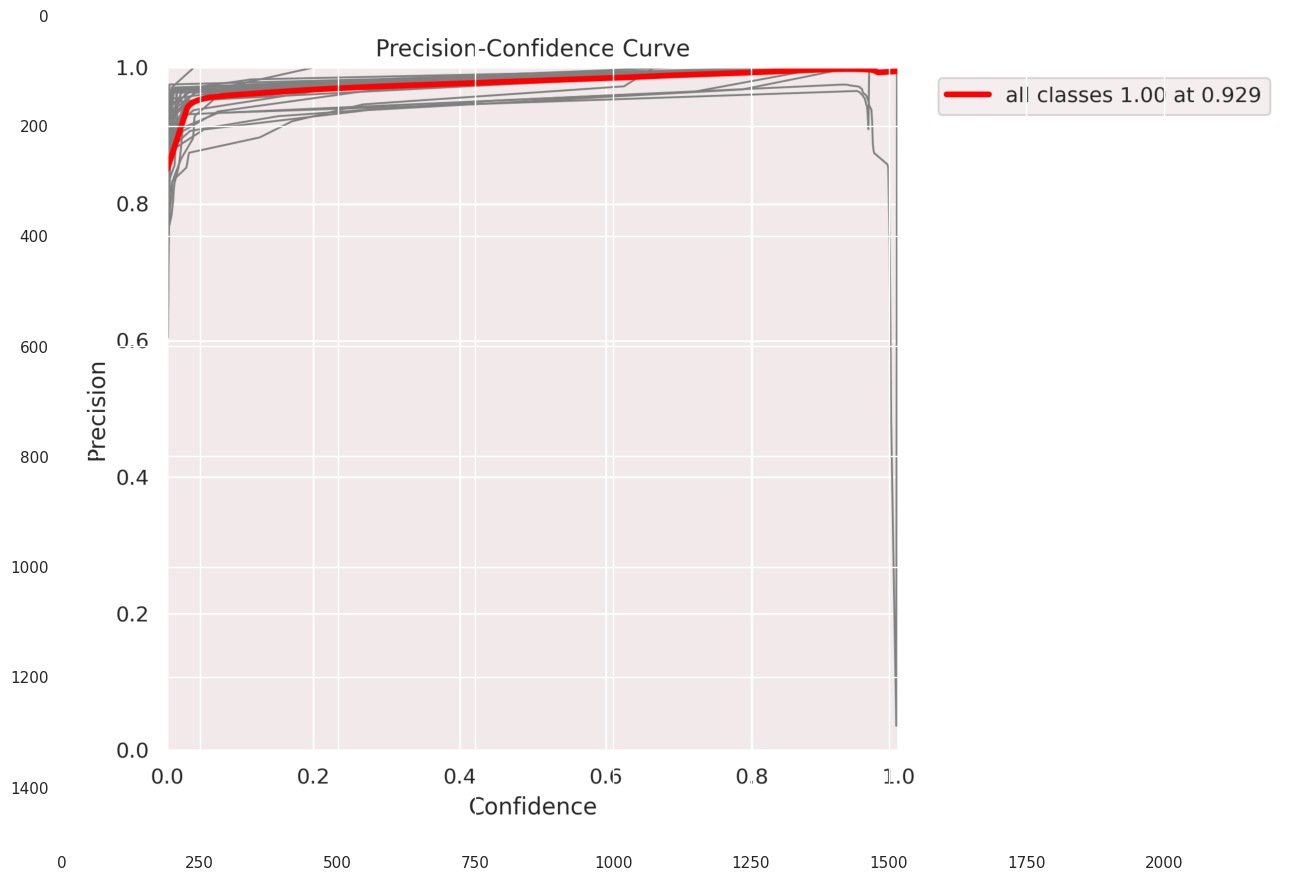

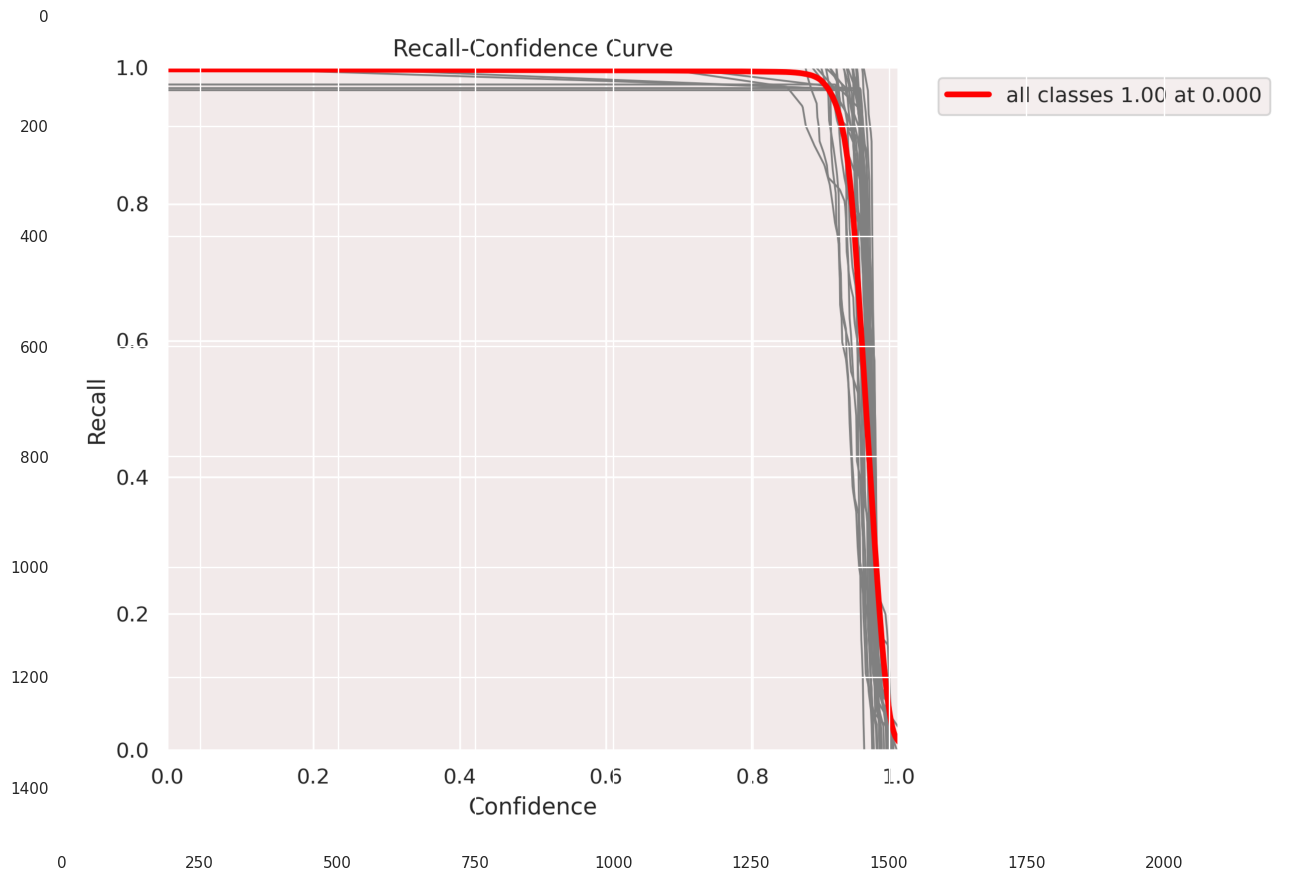

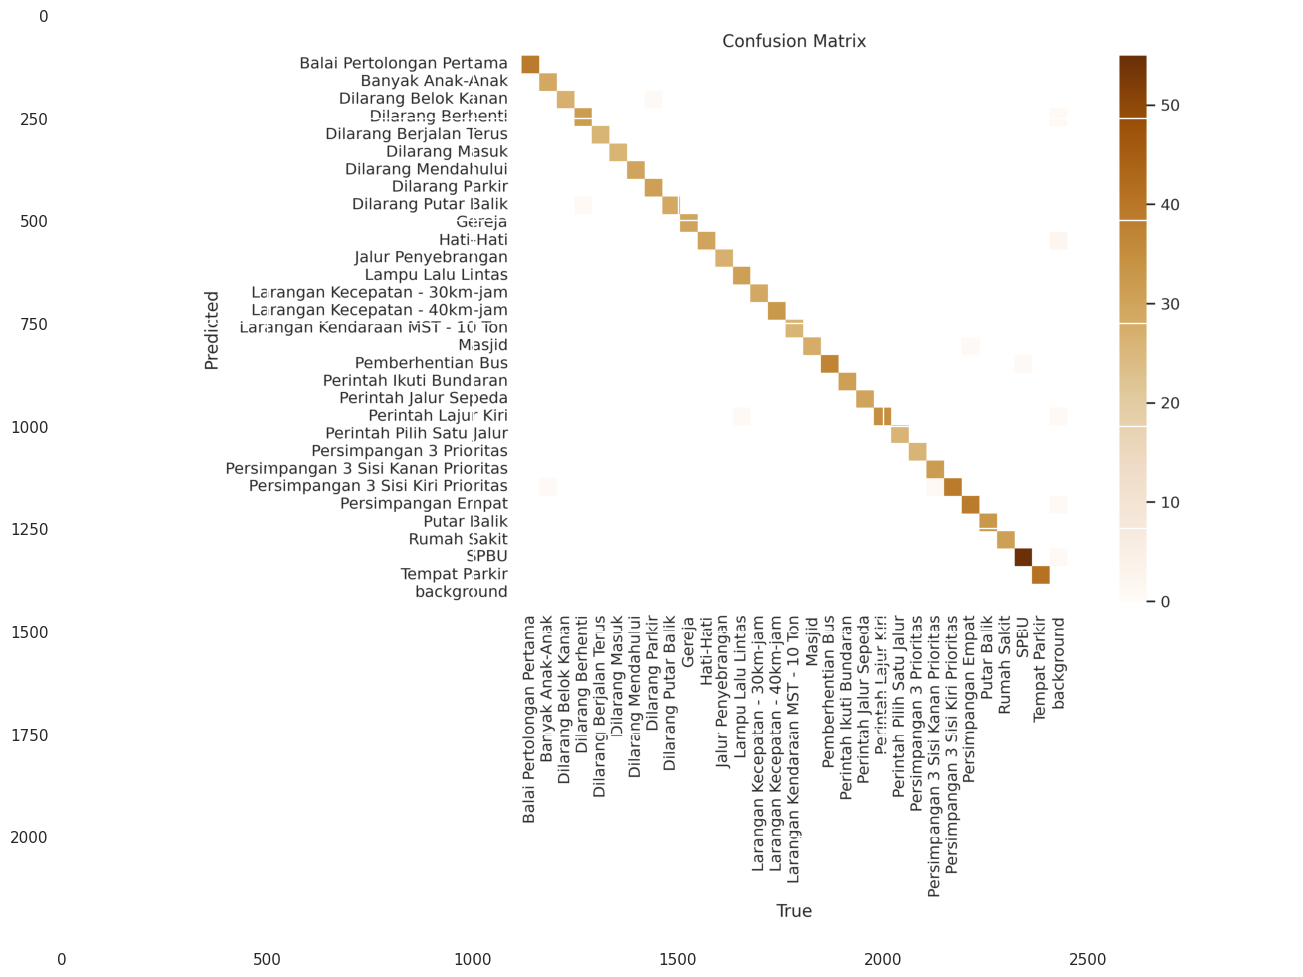

In [15]:
# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'/content/runs/detect/train2/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

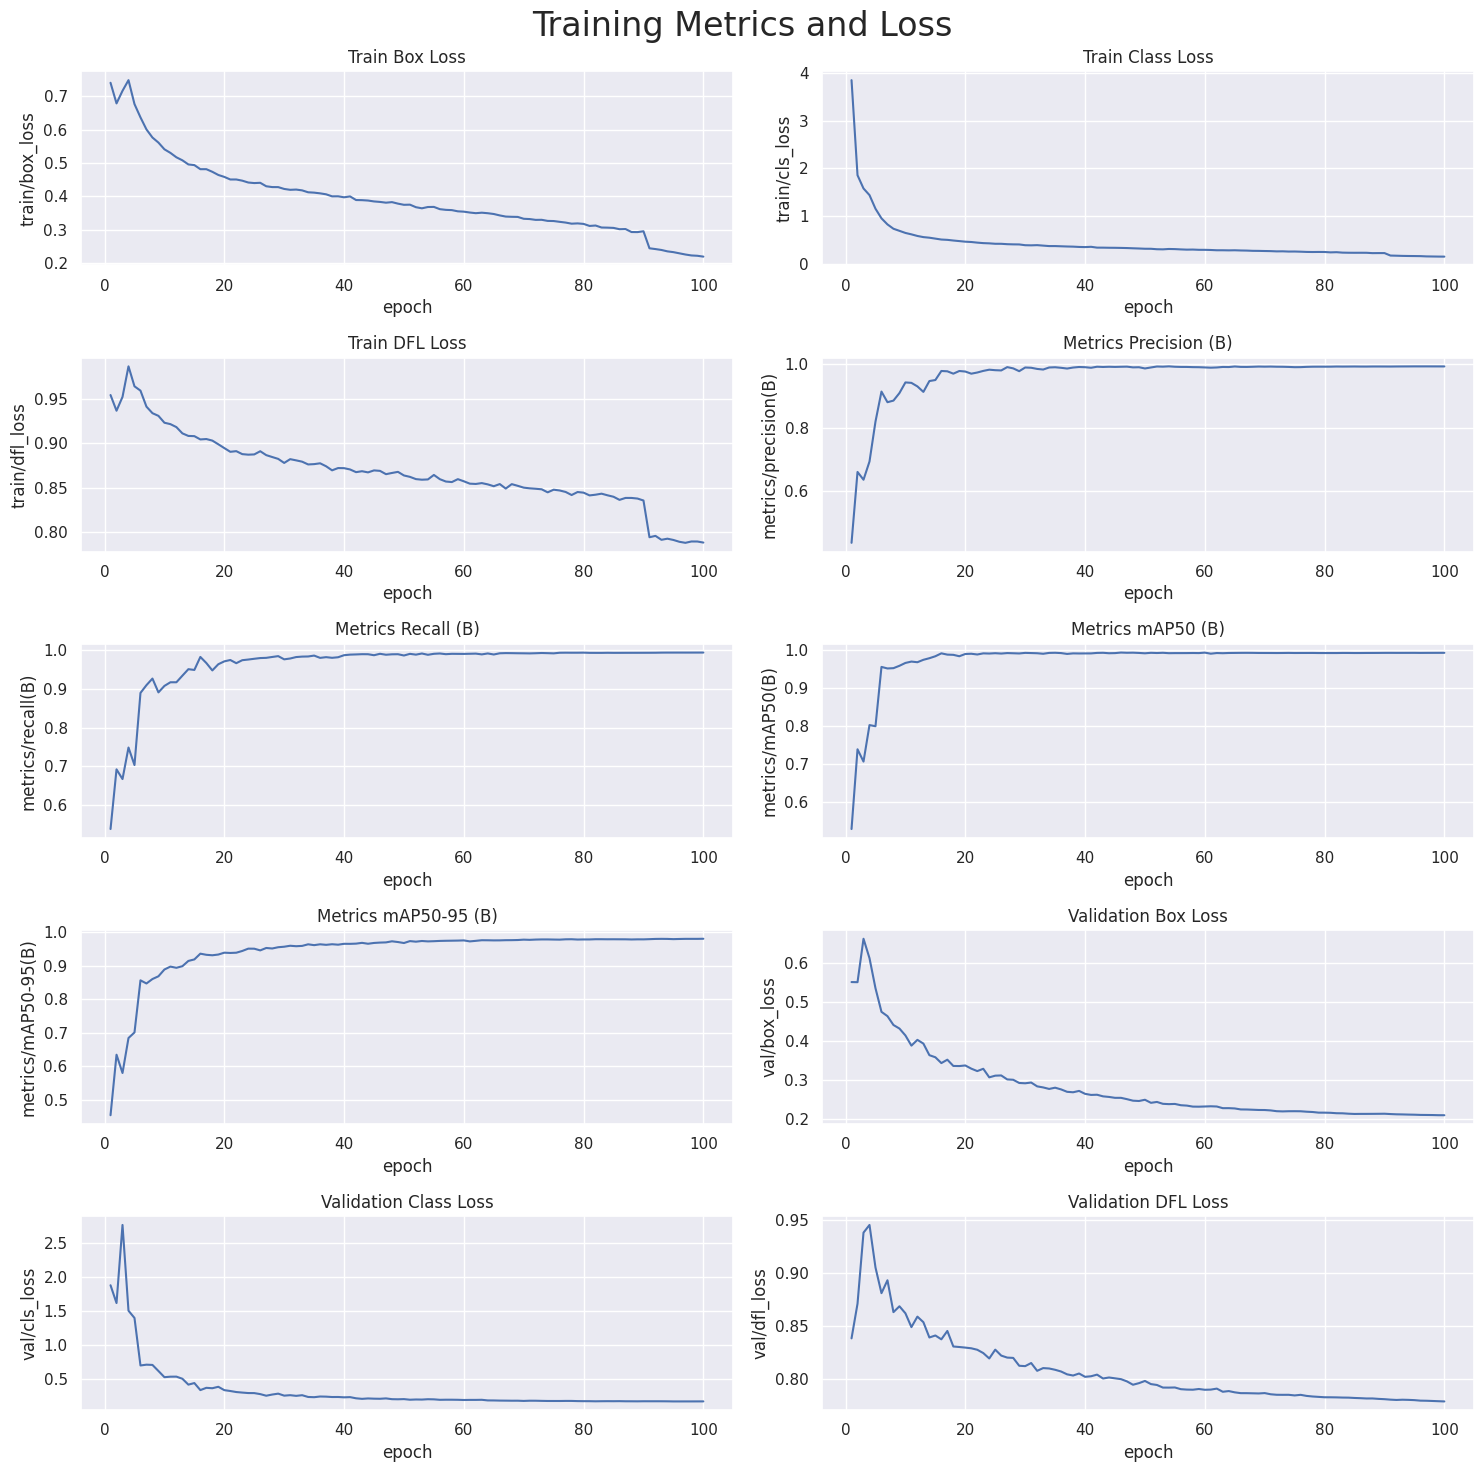

In [16]:
# Read the results.csv file as a pandas dataframe
Result_Final_model = pd.read_csv('/content/runs/detect/train2/results.csv')
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [17]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,588,002 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/test/labels... 466 images, 0 backgrounds, 0 corrupt: 100%|██████████| 466/466 [00:00<00:00, 604.08it/s]


val: New cache created: /content/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:07<00:00,  4.26it/s]


                   all        466        487      0.995      0.999      0.995      0.985
Balai Pertolongan Pertama         14         14      0.993          1      0.995      0.995
      Banyak Anak-Anak         23         23      0.995          1      0.995      0.993
  Dilarang Belok Kanan         14         14          1          1      0.995      0.951
     Dilarang Berhenti         19         19      0.995          1      0.995      0.995
Dilarang Berjalan Terus         17         17      0.993          1      0.995      0.995
        Dilarang Masuk         24         24      0.996          1      0.995      0.987
   Dilarang Mendahului         16         16          1          1      0.995      0.995
       Dilarang Parkir         13         13      0.992          1      0.995       0.99
  Dilarang Putar Balik         18         20          1      0.986      0.995       0.98
                Gereja         11         11      0.989          1      0.995      0.995
             Hati

In [18]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9946598618966678
metrics/recall(B):  0.9986024566965779
metrics/mAP50(B):  0.9950000000000002
metrics/mAP50-95(B):  0.9851376274477801


In [19]:
# Path to the directory containing the images
image_dir = '/content/test/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 1 Persimpangan 3 Sisi Kiri Prioritas, 15.3ms
Speed: 3.8ms preprocess, 15.3ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train22

0: 416x416 1 Banyak Anak-Anak, 15.8ms
Speed: 2.5ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train23

0: 416x416 1 Persimpangan Empat, 15.5ms
Speed: 2.4ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train24

0: 416x416 1 Perintah Jalur Sepeda, 14.6ms
Speed: 2.3ms preprocess, 14.6ms inference, 1.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train25

0: 416x416 1 Perintah Ikuti Bundaran, 1 Perintah Lajur Kiri, 15.1ms
Speed: 2.3ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train26

0: 416x416 1 Dilarang Belok Kanan, 17.1ms
Speed: 3.9ms preprocess, 17.1ms infer

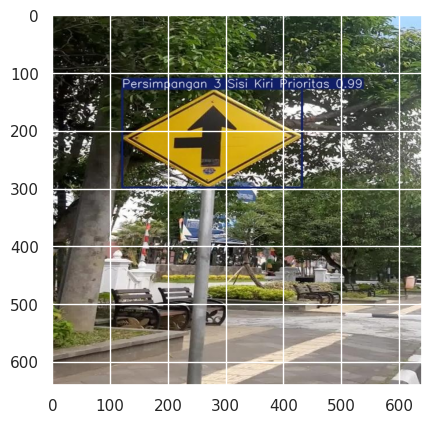

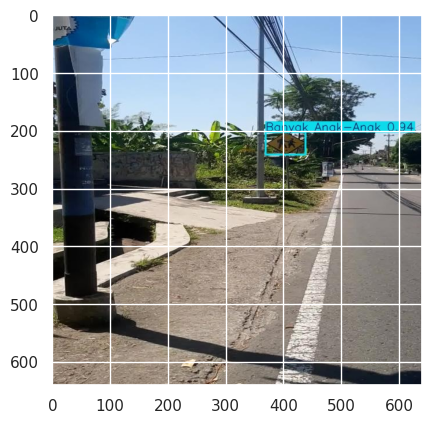

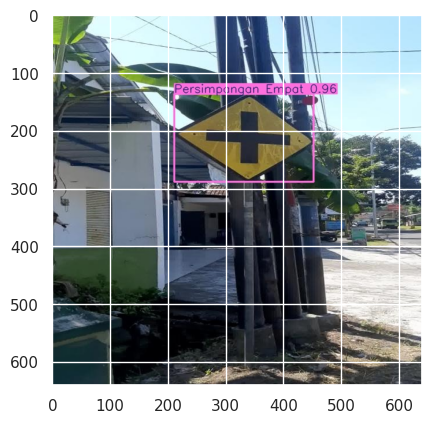

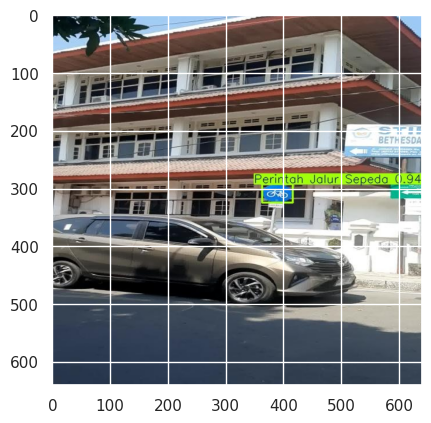

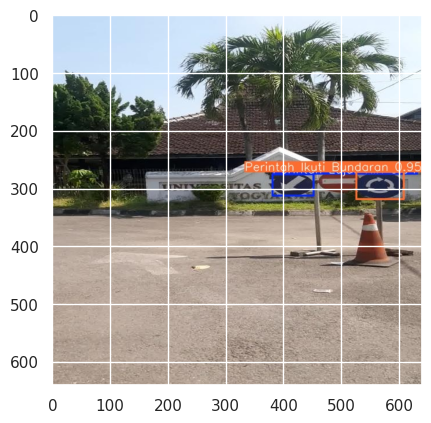

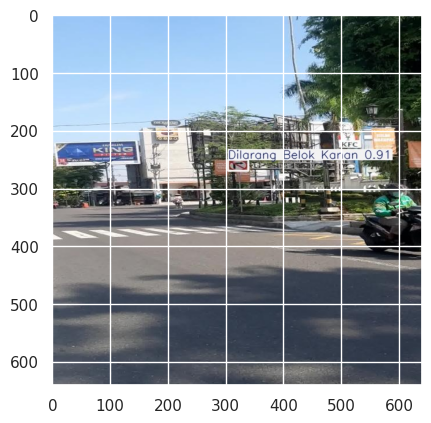

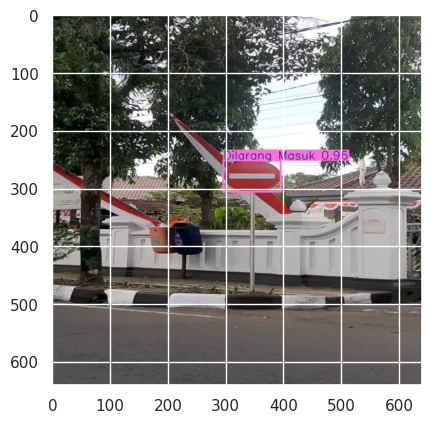

In [21]:
# View results
for i in range(2,9):
    plt.imshow(plt.imread(f'/content/runs/detect/train2{i}/image0.jpg'))
    plt.show()